<a href="https://colab.research.google.com/github/avi78/AI_ML/blob/main/Naive_Bayes_Titanic_1NT21CS024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Titaanic_Dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[ 26.      26.    ]
 [ 40.     134.5   ]
 [ 42.      26.2875]
 ...
 [ 32.      30.5   ]
 [ 28.      13.5   ]
 [ 19.      10.1708]]


In [5]:
print(y_train)

[0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 

In [6]:
print(X_test)

[[ 14.       7.8542]
 [  5.      69.55  ]
 [ 46.      39.6   ]
 [ 31.       7.925 ]
 [  8.      25.4667]
 [ 40.       0.    ]
 [ 42.      52.5542]
 [  4.      15.2458]
 [ 45.      26.55  ]
 [ 27.      26.    ]
 [ 41.      20.2125]
 [ 48.     146.5208]
 [ 19.       7.8958]
 [ 19.      36.75  ]
 [ 19.      14.5   ]
 [ 23.       7.225 ]
 [ 34.      23.    ]
 [ 32.       7.8542]
 [ 60.      26.55  ]
 [ 60.      79.2   ]
 [ 21.      69.55  ]
 [ 18.       7.7333]
 [ 16.       8.05  ]
 [ 50.     133.65  ]
 [ 35.      26.2875]
 [ 38.      80.    ]
 [  3.      21.075 ]
 [ 21.      10.5   ]
 [ 24.       7.4958]
 [ 21.       8.05  ]
 [  0.83    29.    ]
 [ 23.       7.55  ]
 [ 48.      25.9292]
 [ 15.       7.225 ]
 [ 58.      29.7   ]
 [ 54.      78.2667]
 [ 65.      26.55  ]
 [ 29.       8.1125]
 [ 44.       7.925 ]
 [ 34.      14.4   ]
 [ 17.       8.6625]
 [ 30.      16.1   ]
 [ 31.      26.25  ]
 [ 26.       7.8958]
 [ 17.       7.75  ]
 [ 18.       8.3   ]
 [ 60.      75.25  ]
 [ 28.       

In [7]:
print(y_test)

[0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-0.24513878 -0.14742316]
 [ 0.77027863  1.86115136]
 [ 0.91533826 -0.1421009 ]
 ...
 [ 0.19004011 -0.06411823]
 [-0.10007915 -0.37882576]
 [-0.75284748 -0.4404566 ]]


In [10]:
print(X_test)

[[-1.11549655 -0.48334198]
 [-1.76826488  0.65878348]
 [ 1.20545752  0.10434286]
 [ 0.1175103  -0.48203131]
 [-1.55067544 -0.15729572]
 [ 0.77027863 -0.62874056]
 [ 0.91533826  0.3441537 ]
 [-1.8407947  -0.34650714]
 [ 1.1329277  -0.13724145]
 [-0.17260896 -0.14742316]
 [ 0.84280844 -0.25456256]
 [ 1.35051714  2.0836829 ]
 [-0.75284748 -0.48257187]
 [-0.75284748  0.05158307]
 [-0.75284748 -0.36031355]
 [-0.46272822 -0.49498986]
 [ 0.33509974 -0.20295978]
 [ 0.19004011 -0.48334198]
 [ 2.22087492 -0.13724145]
 [ 2.22087492  0.83742628]
 [-0.60778785  0.65878348]
 [-0.82537729 -0.4855801 ]
 [-0.97043692 -0.47971729]
 [ 1.49557677  1.84541598]
 [ 0.40762956 -0.1421009 ]
 [ 0.625219    0.85223605]
 [-1.91332451 -0.23859578]
 [-0.60778785 -0.43436238]
 [-0.39019841 -0.48997675]
 [-0.60778785 -0.47971729]
 [-2.07071421 -0.09188654]
 [-0.46272822 -0.48897339]
 [ 1.35051714 -0.14873383]
 [-1.04296674 -0.49498986]
 [ 2.07581529 -0.07892799]
 [ 1.78569603  0.82014884]
 [ 2.58352399 -0.13724145]
 

## Training the Naive Bayes model on the Training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting a new result

In [12]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[136   6]
 [ 69  11]]


0.6621621621621622

## Visualising the Training set results

<ipython-input-15-a9df654dd39d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j)


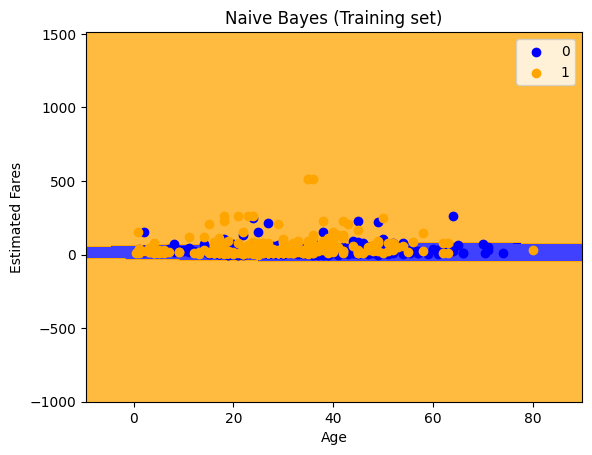

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Fares')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-16-629a767f3860>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j)


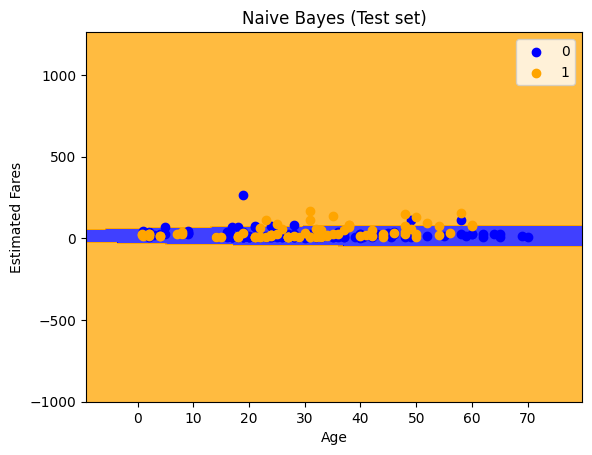

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Fares')
plt.legend()
plt.show()